In [282]:
import pickle
import os
import numpy as np

path = "/home/user/Projects/interaction_gyt/preprocess_challenge_4s/"
name = "1_1EP0.pkl"

with open(os.path.join(path, 'train', name), 'rb') as f:
    new_data = pickle.load(f, encoding="latin1")
    
with open(os.path.join(path, 'train', name), 'rb') as f:
    origin_data = pickle.load(f, encoding="latin1")

In [4]:
print(new_data.keys())
print(new_data['others_track'].keys())

print(origin_data.keys())
print(origin_data['agt_ids'])
print(origin_data['idx'])

dict_keys(['shapes', 'idx', 'ref_paths', 'graph', 'has_preds', 'filename', 'gt_preds', 'agt_ids', 'ctrs', 'theta', 'gt_hist', 'rot', 'feats', 'orig'])


KeyError: 'others_track'

In [5]:

with open(os.path.join("/home/user/Projects/interaction_gyt/reactivity_tracks", "7_144200_154200_44P0.pkl"), 'rb') as f:
    react_data = pickle.load(f, encoding="latin1")


In [484]:
react_data['others_track'].keys()
print(react_data['others_track'][44])
print(react_data['others_track'][45])

[[1.8, 4.8, '144200', '154200'], ['144300', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['144400', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['144500', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['144600', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['144700', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['144800', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['144900', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['145000', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['145100', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['145200', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['145300', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['145400', 991.3005981445312, 993.2225341796875, 0, 0, -2.664974139211192], ['145500', 991.3005981445312, 993.2225341796875, 0, 0, 

KeyError: 'egos_track'

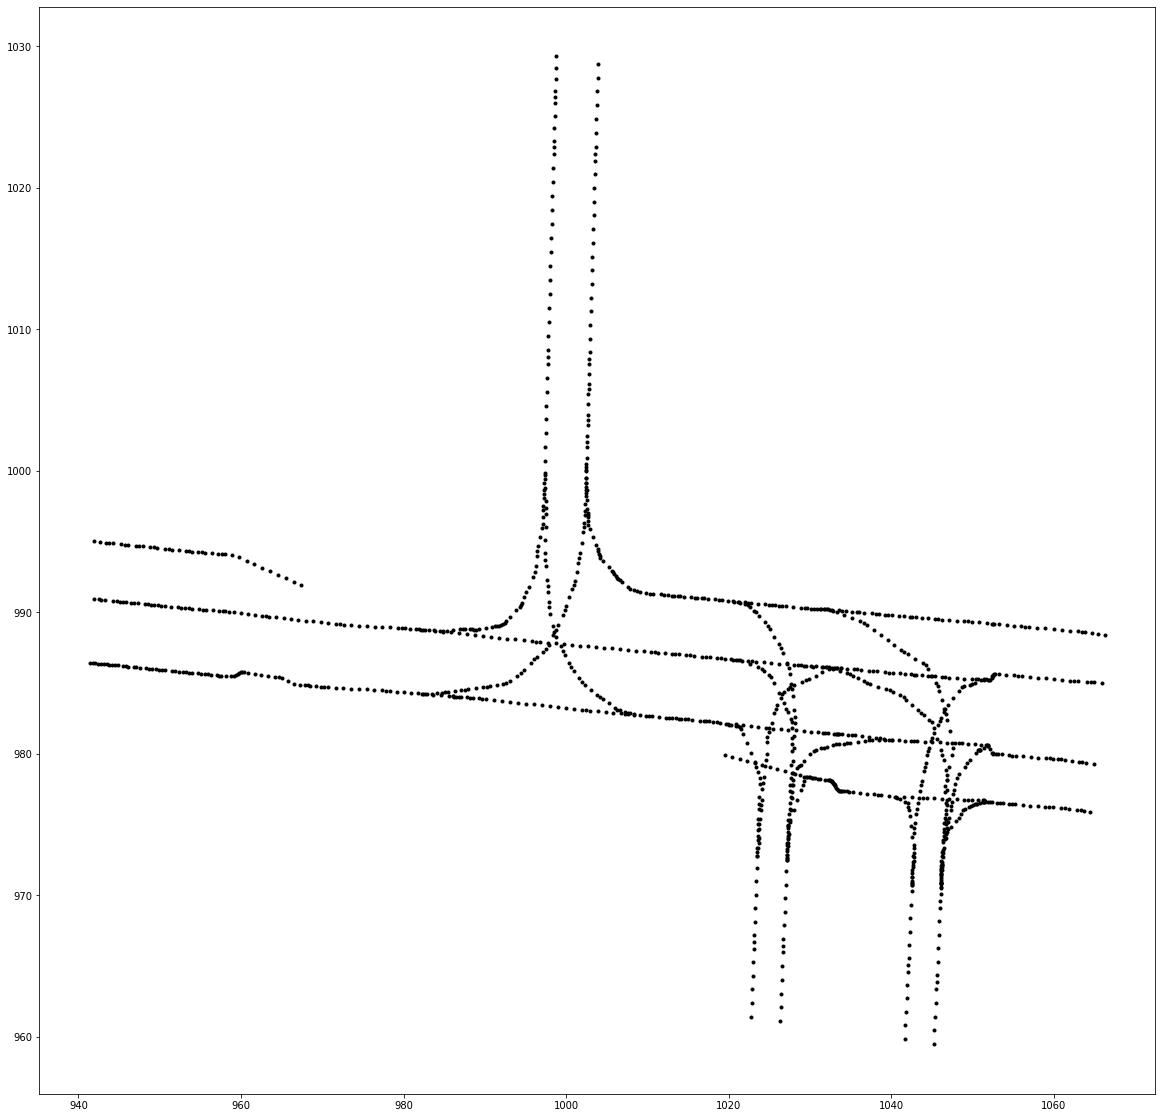

In [8]:
fig, ax = plt.subplots(1, 1, figsize=[20,20])
# ax.set_aspect('equal')

graph_ctrs = np.matmul(origin_data['graph']['ctrs'], origin_data['rot']) + origin_data['orig']
ax.plot(graph_ctrs[:, 0], graph_ctrs[:, 1], 'k.')
for a in new_data['egos_track'].keys():
    traj = np.asarray(new_data['egos_track'][a][1:])
#     plt.plot(traj[:, 0], traj[:, 1], 'r*')

for a in new_data['others_track'].keys():
    traj = np.asarray(new_data['others_track'][a][1:])
    plt.plot(traj[:, 1], traj[:, 2], 'b*')
    
for a in new_data['collision_id'].keys():
    traj = np.asarray(new_data['collision_id'][a])
#     plt.plot(traj[:, 1], traj[:, 2], 'b*')
    plt.plot(traj[:, 0], traj[:, 1], 'r*')
    

NameError: name 'data' is not defined

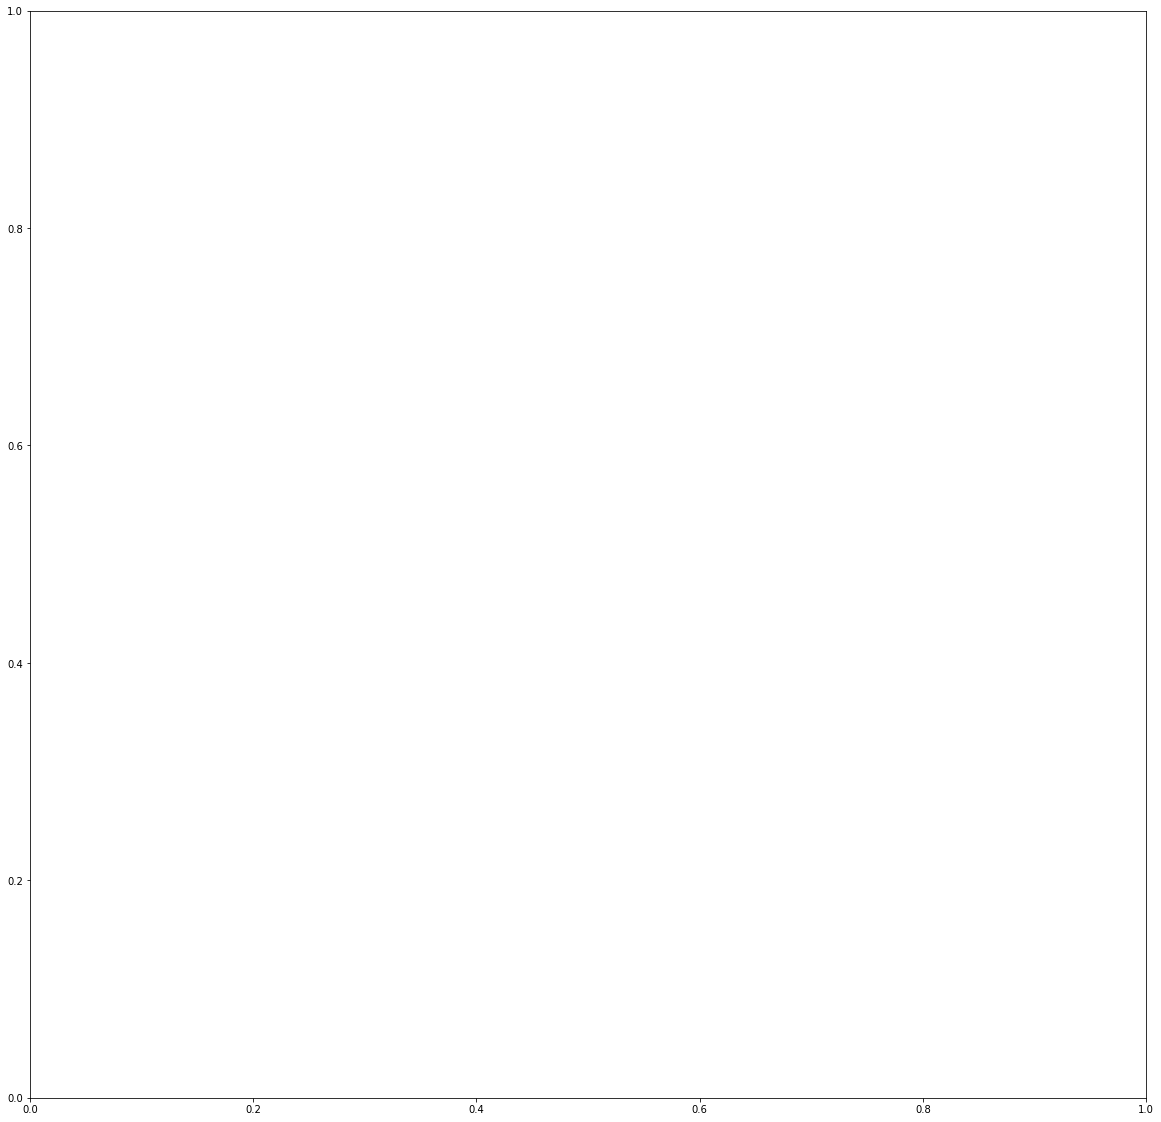

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=[20,20])
pt = 50
# graph = data['graph']
# mp = graph['ctrs']

# X = []
# Y = []
# C = []

# # cl = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

# for i in range(len(graph['suc'])):
#     u = graph['suc'][i]['u']
#     v = graph['suc'][i]['v']
# #     print('v size:', v.shape)
    
#     tmp = np.where(u == pt)
#     if tmp is not None and tmp[0] is not None and tmp[0].shape[0] > 0:
#         print(i, 'l:', len(tmp[0]))
        
#         for idx in tmp[0]:
# #             idx = tmp[0][0]

#             X.append(mp[v[idx], 0])
#             Y.append(mp[v[idx], 1])
#             C.append(i)

            
# # for side in ['left_pairs', 'right_pairs']:
# #     u = graph[side]['u']
# #     v = graph[side]['v']

# #     tmp = np.where(u == pt)
# #     if tmp and tmp[0] and tmp[0].shape[0] > 0:
# #         print(side, 'l:', len(tmp[0]))
        
# #         for idx in tmp[0]:
# #             X.append(mp[v[idx], 0])
# #             Y.append(mp[v[idx], 1])
# #             C.append(1)
    
    
# plt.plot(mp[:, 0], mp[:, 1], 'k.')
# plt.plot(X, Y)

# plt.scatter(X, Y, s = 200, c = C)
# print(X, Y)

# # for a in range(data['feats'].shape[0]):
# #     traj = data['feats'][a]
# #     plt.plot(traj[:, 0], traj[:, 1], '*')

# #     for L in data['ref_paths'][a]:
# #         if len(L)==0:
# #             continue
# #         lane = np.concatenate(L) - data['orig']
# #         plt.plot(lane[:, 0], lane[:, 1])
        

for a in range(data['feats'].shape[0]):
    traj = np.matmul(data['rot'], (data['gt_preds'][a] - data['orig']).T).T
    plt.plot(traj[:, 0], traj[:, 1], 'r*')
#     plt.plot(traj[:1, 0], traj[:1, 1], 'r*')
    
    hist = np.matmul(data['rot'], (data['gt_hist'][a][:, :2] - data['orig']).T).T
    plt.plot(hist[:, 0], hist[:, 1], 'y*')
    
    prediction = np.matmul(data['rot'], (data['prediction'][a][0] - data['orig']).T).T
    plt.plot(prediction[:, 0], prediction[:, 1], 'b*')
    
    for L in data['ref_paths'][a]:
        lane = np.matmul(data['rot'], (L - data['orig']).T).T
#         plt.plot(lane[:, 0], lane[:, 1], 'r')      

    # plt.savefig('/home/user/Logs/0607/地图6步未插值' + str(pt) + '.png')


In [25]:
print (graph['suc'][0])
print (graph['feats'].shape)

{'u': array([   0,    1,    2, ..., 1328, 1329, 1330]), 'v': array([   1,    2,    3, ..., 1329, 1330, 1331])}
(1332, 2)


In [11]:
def dfs(cur_graph_id, Lanes, lane, cur_len, S_pred):
    suc_indices = (graph['suc'][0]['u']==cur_graph_id).nonzero()
    if cur_len > S_pred or suc_indices[0].shape[0]==0:
        Lanes.append(lane[:])
        print(cur_len, S_pred)
        print(Lanes[-1])
        return 
    
    for suc_id in suc_indices:
#         print(graph['suc'][0]['v'][suc_id[0]])
#         print(suc_id)
        lane.append(graph['suc'][0]['u'][suc_id[0]])
        
        s_diff = graph['ctrs'][graph['suc'][0]['v'][suc_id[0]]] - graph['ctrs'][graph['suc'][0]['u'][suc_id[0]]]
        s = np.sqrt(np.sum(s_diff ** 2))
#         print(s.numpy())
        dfs(graph['suc'][0]['v'][suc_id[0]], Lanes, lane, cur_len + s, S_pred)
        lane.pop()

ego_graph_id = 300
Lanes = []
dfs(ego_graph_id, Lanes, [], 0, S_pred=100)
frenet_lane = graph['ctrs'][Lanes[0]]

NameError: name 'graph' is not defined

In [7]:
graph['ctrs'].shape

NameError: name 'graph' is not defined

NameError: name 'graph' is not defined

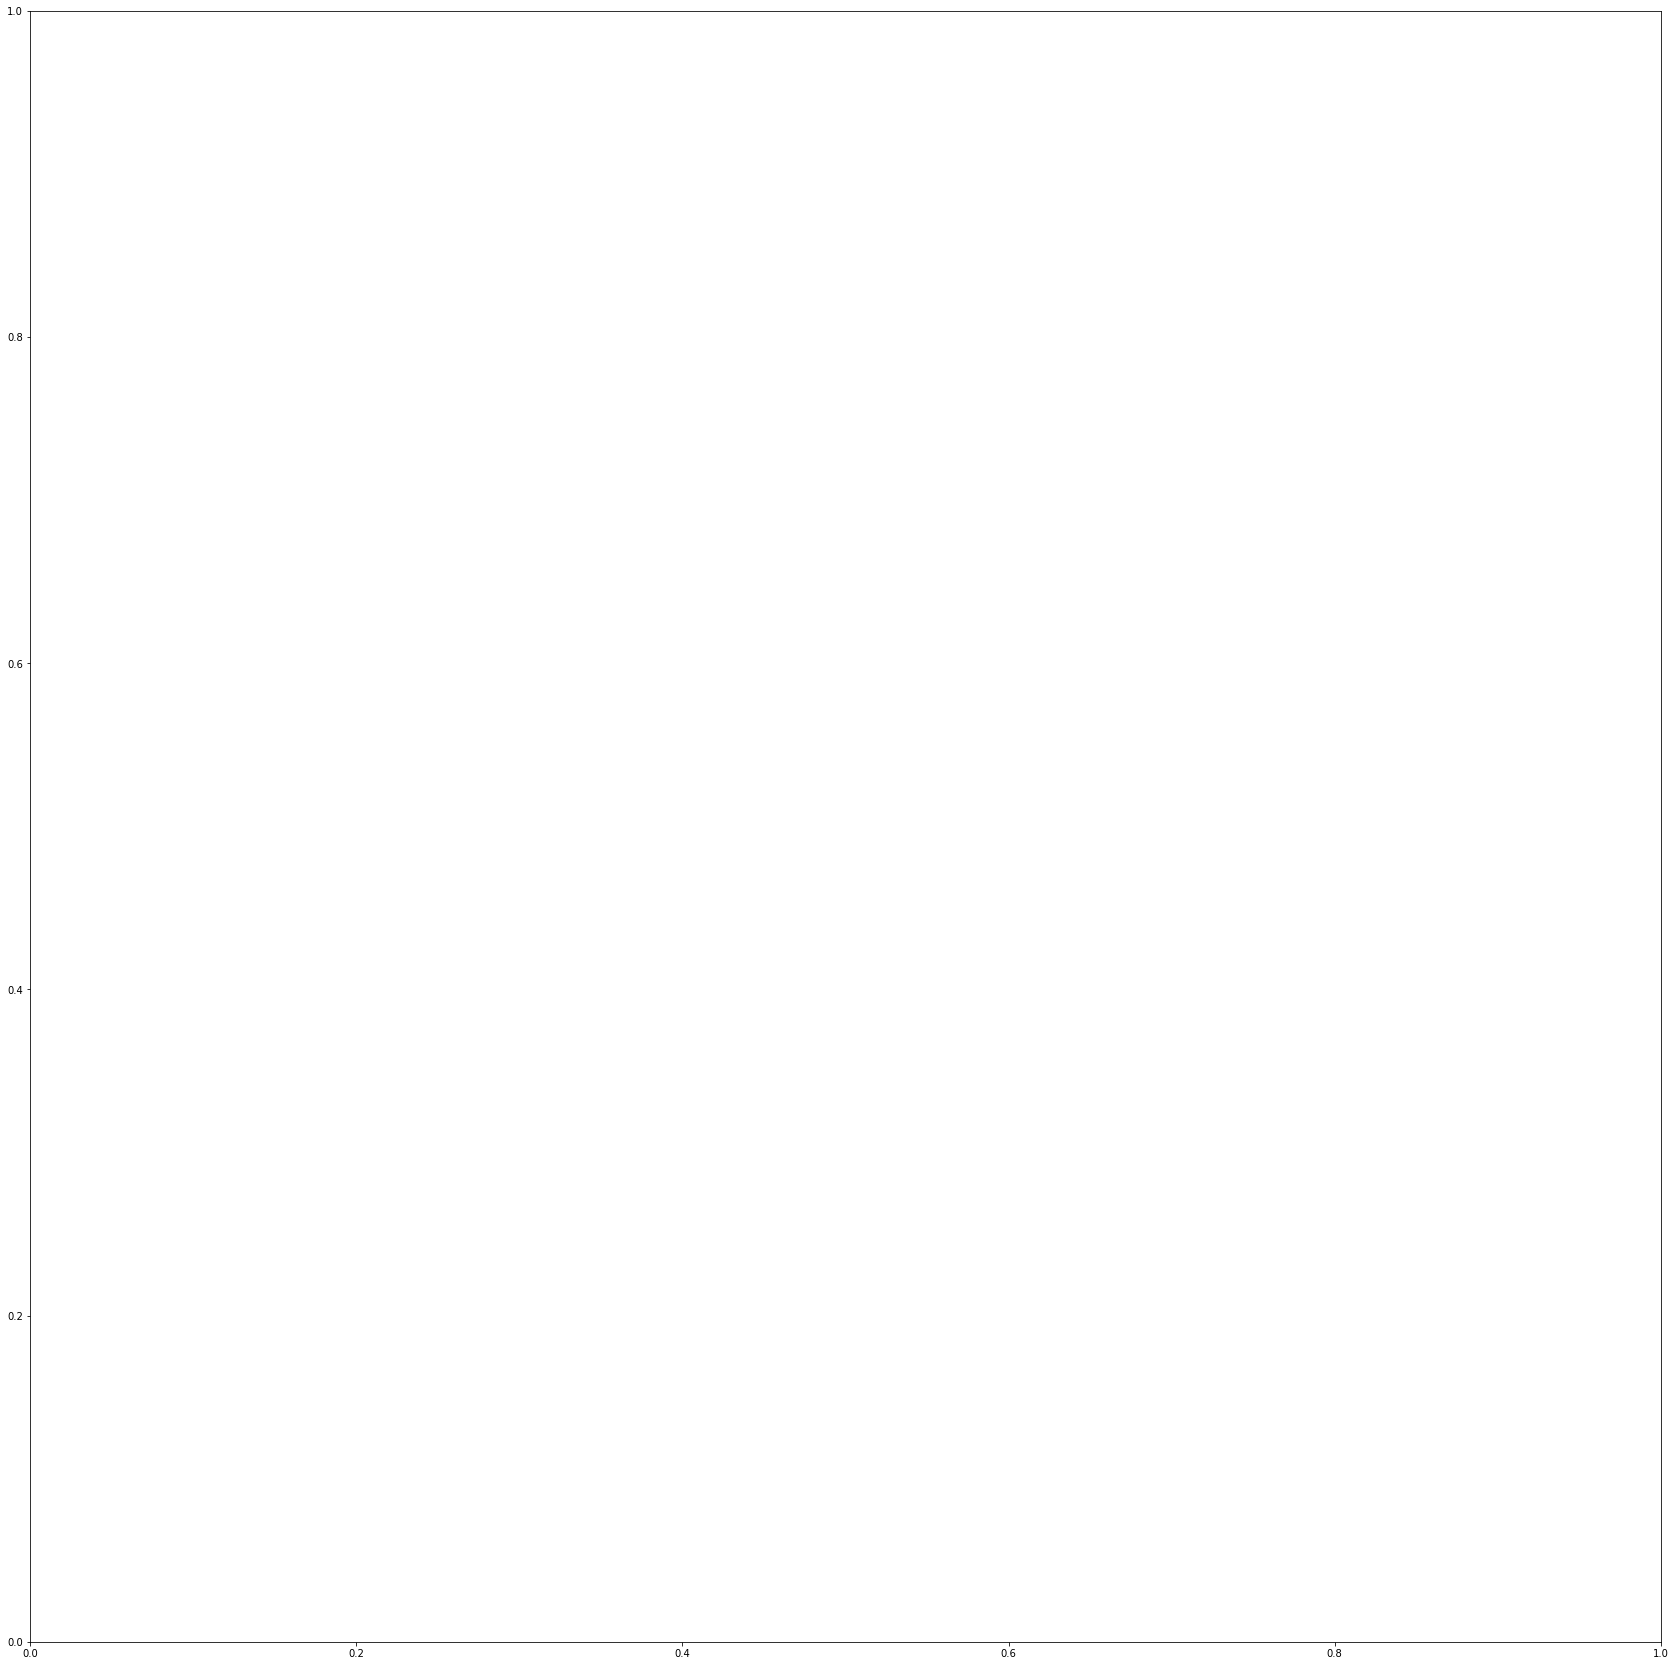

In [8]:
idx = 1

fig, ax = plt.subplots(1,1, figsize=(30,30))
ax.set_aspect('equal', adjustable='box')
#     plt.gca().invert_xaxis()
#     plt.gca().invert_yaxis()     
# for a in range(data['gt_preds'][0].shape[0]):
#     mask = has_preds[a]
#     gt_pred = gt_preds[a][mask]

#     hist = data['feats'][idx][a]
# #     plt.plot(hist[:, 0], hist[:, 1], 'y.')
# #     traj_plot(gt_pred,  rot, orig, ax, 'r.')

#     pred_traj = results[idx][a, k, :, :]
# #     traj_plot(pred_traj, rot, orig, ax, 'b.')


ctrs = graph['ctrs']
ax.plot(ctrs[:, 0], ctrs[:, 1], 'k.')

ego_graph_id = 100
Lanes = []

ax.plot([graph['ctrs'][ego_graph_id][0]], [graph['ctrs'][ego_graph_id][1]], 'b*')
dfs(ego_graph_id, Lanes, [], 0, S_pred=100)
for Lane in Lanes:
    frenet_lane = graph['ctrs'][Lane]
    ax.plot(frenet_lane[:, 0], frenet_lane[:, 1], 'g')


plt.show()

In [29]:
n_agts = data['gt_preds'][0].shape[0]
dis = np.zeros([n_agts, n_agts])
for a in range(n_agts):
    for b in range(n_agts):
        if a == b:
            dis[a, b] = float('inf')
            continue
        sss = torch.sum((data['gt_preds'][0][a] - data['gt_preds'][0][b]) ** 2, 1)
        dis[a, b] = torch.min(sss).item()
        
print(dis)
np.argmin(dis, 0)


NameError: name 'torch' is not defined

In [ ]:
torch.argmin(sss)
dis

In [30]:
import torch
from torch.utils.data import DataLoader, Sampler
from torch.utils.data.distributed import DistributedSampler
from tqdm import tqdm
import sys
from importlib import import_module
from utils import Logger, load_pretrain, gpu, to_long,  Optimizer, StepLR

from data import InteDataset

root_path = '/home/user/Projects/LaneGCN_modified'
sys.path.insert(0, root_path)

model = import_module("lanegcn")
config, _, collate_fn, net, loss, post_process, opt = model.get_model(80)



ckpt_path = "/home/user/Datasets/interpolated/preprocess_results_10s_interp10scale8/results/30.000.ckpt"
# ckpt_path = "/media/drl/datas/zyk/LaneGCN/results/lanegcn/17.000.ckpt"

if not os.path.isabs(ckpt_path):
    ckpt_path = os.path.join(config["save_dir"], ckpt_path)
ckpt = torch.load(ckpt_path, map_location=lambda storage, loc: storage)
load_pretrain(net, ckpt["state_dict"])
net.eval()





dataset = InteDataset('/home/user/Datasets/interpolated/preprocess_results_10s_interp10scale8/tmp/')
data_loader = DataLoader(
    dataset,
    batch_size=config["val_batch_size"],
    num_workers=config["val_workers"],
    collate_fn=collate_fn,
    shuffle=True,
    pin_memory=True,
)

# begin inference
preds = {}
gts = {}
cities = {}

data_list = []
for ii, data in tqdm(enumerate(data_loader)):
    data = dict(data)
    with torch.no_grad():
        output = net(data)
        results = [x.detach().cpu().numpy() for x in output["reg"]]


1it [00:02,  2.30s/it]


In [ ]:
print(data['graph'][0].keys())
print(data['graph'][0]['feats'].shape)
print(data['graph'][0]['left_pairs'].shape)

In [ ]:
from lanegcn import graph_gather, actor_gather

actors, actor_idcs = actor_gather(gpu(data["feats"]))
actor_ctrs = gpu(data["ctrs"])
actors = net.actor_net(actors)

# construct map features
graph = graph_gather(to_long(gpu(data["graph"])))
nodes, node_idcs, node_ctrs = net.map_net(graph)

# actor-map fusion cycle 
nodes = net.a2m(nodes, graph, actors, actor_idcs, actor_ctrs)
nodes = net.m2m(nodes, graph)
actors = net.m2a(actors, actor_idcs, actor_ctrs, nodes, node_idcs, node_ctrs)
actors = net.a2a(actors, actor_idcs, actor_ctrs)

In [ ]:
print('len', len(node_ctrs))
print('node_ctrs[0]', node_ctrs[0].cpu().numpy().shape)
print(graph['pre'][0]['u'].cpu().numpy())

all_ctrs = torch.cat(node_ctrs, 0).cpu().numpy()
print(all_ctrs.shape)
idx = np.where(u == pt)
print(graph['left'])

NameError: name 'node_ctrs' is not defined

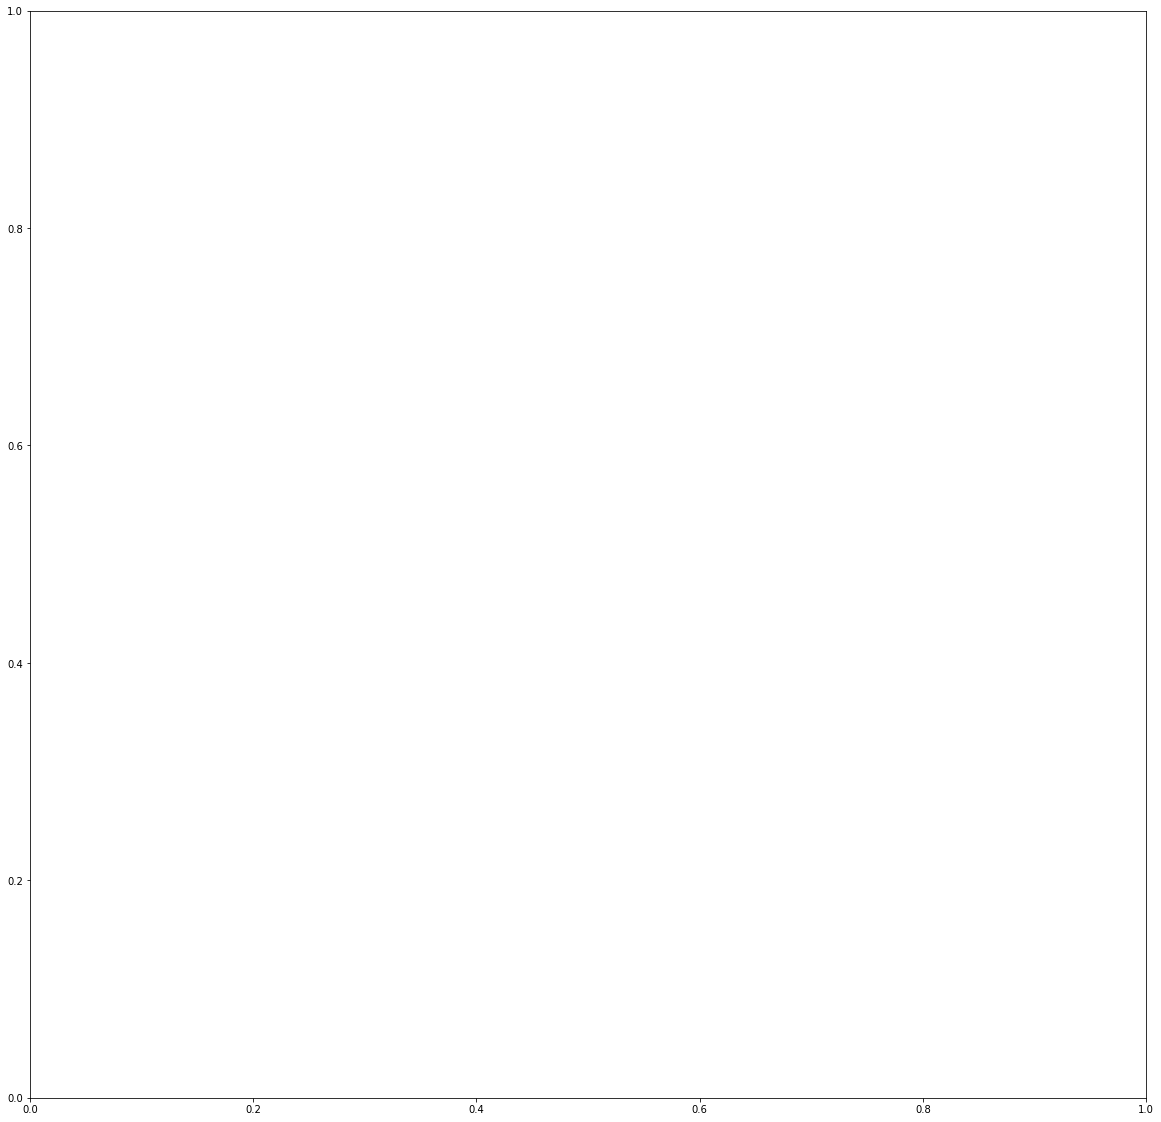

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=[20,20])
pt = 270
mp = node_ctrs[0].cpu().numpy()

X = []
Y = []
C = []

cl = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']

for i in range(len(graph['suc'])):
    u = graph['suc'][i]['u'].cpu().numpy()
    v = graph['suc'][i]['v'].cpu().numpy()
#     print('v size:', v.shape)
    
    tmp = np.where(u == pt)
    if tmp is not None and tmp[0] is not None and tmp[0].shape[0] > 0:
#         print(i, 'l:', len(tmp[0]))
        
        for idx in tmp[0]:
#             idx = tmp[0][0]

            X.append(all_ctrs[v[idx], 0])
            Y.append(all_ctrs[v[idx], 1])
            C.append(cl[i])

            
for side in ['left', 'right']:
    u = graph[side]['u'].cpu().numpy()
    v = graph[side]['v'].cpu().numpy()

    tmp = np.where(u == pt)
    if tmp and tmp[0] and tmp[0].shape[0] > 0:
        print(side, 'l:', len(tmp[0]))
        
        for idx in tmp[0]:
            X.append(all_ctrs[v[idx], 0])
            Y.append(all_ctrs[v[idx], 1])
            C.append(cl[1])
    
    
plt.plot(mp[:, 0], mp[:, 1], 'r.')
# plt.plot(X, Y)

plt.scatter(X, Y, s = 100, c = C)
print(X, Y)

# plt.savefig('/home/user/Logs/0607/地图6步未插值' + str(pt) + '.png')


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=[20,20])

u = graph['pre'][i]['u'].cpu().numpy()
print('u size:', u.shape)
v = graph['pre'][i]['v'].cpu().numpy()

In [456]:
import pickle
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.axes
from matplotlib.collections import PatchCollection
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib.colors as colors
from shapely.geometry import Polygon


def rect_plot(pos, rot, orig, w, l, ax, c):
    rot = rot.numpy()
    orig = orig.numpy()    

    ax.plot(centerline[:, 0], centerline[:, 1], c)
    return centerline

def polygon_xy_from_motionstate(ms, width, length):
    lowleft = (ms[0] - length / 2., ms[1] - width / 2.)
    lowright = (ms[0] + length / 2., ms[1] - width / 2.)
    upright = (ms[0] + length / 2., ms[1] + width / 2.)
    upleft = (ms[0] - length / 2., ms[1] + width / 2.)
    return rotate_around_center(np.array([lowleft, lowright, upright, upleft]), np.array([ms[0], ms[1]]), yaw=ms[2])

def rotate_around_center(pts, center, yaw):
    return np.dot(pts - center, np.array([[np.cos(yaw), np.sin(yaw)], [-np.sin(yaw), np.cos(yaw)]])) + center


path = "/home/user/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/"
new_test = 'test_0913_3'
filenames = os.listdir(os.path.join(path, new_test))

# name = filenames[150]
collision_trajs_count = 0
all_trajs_count = 0
for name in filenames:
    
    with open(os.path.join(path, new_test, name), 'rb') as f:
        new_data = pickle.load(f, encoding="latin1")

    with open(os.path.join(path, 'test', name), 'rb') as f:
        origin_data = pickle.load(f, encoding="latin1")

    N = len(new_data['others_track'].keys())
    collision = np.zeros(N)
    all_trajs_count += N
    for time_stamp in range(100):
        polygon_coll = []
        for a in new_data['others_track'].keys():
            tmp = np.zeros([3])
            tmp[0] = new_data['others_track'][a][1:][time_stamp][1]
            tmp[1] = new_data['others_track'][a][1:][time_stamp][2]
            tmp[2] = new_data['others_track'][a][1:][time_stamp][5]

            width = new_data['others_track'][a][0][0]
            length = new_data['others_track'][a][0][1]
            ms = tmp
            rect = matplotlib.patches.Polygon(polygon_xy_from_motionstate(ms, width, length), closed=True, zorder=20)
            polygon_coll.append(Polygon(rect.get_verts()))

        for i in range(len(polygon_coll)):
            p1 = polygon_coll[i]
            for j in range(i+1, len(polygon_coll)):
                p2 = polygon_coll[j]

                if(p1.intersects(p2)):
                    collision[i] = 1
                    collision[j] = 1

    collision_trajs_count += np.sum(collision)
#     print("%d of %d collision detected!" %(collision_trajs_count, all_trajs_count))

KeyboardInterrupt: 

In [113]:
collision_trajs_count / all_trajs_count

0.3197613197613198

In [46]:
path = "/home/user/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/"
new_test = 'test_0910'
filenames = os.listdir(os.path.join(path, new_test))
name = "1_226400_236400_73P0.pkl"
# name = "3_284000_294000_80P0.pkl"

with open(os.path.join(path, new_test, name), 'rb') as f:
    new_data = pickle.load(f, encoding="latin1")

with open(os.path.join(path, 'test', name), 'rb') as f:
    origin_data = pickle.load(f, encoding="latin1")


others_ids = new_data['others_track'].keys()
def create_animation():
    plt.ioff()
    fig, ax = plt.subplots(1,1, figsize=(20, 20))
    ax.set_aspect('equal', adjustable='box')

#   plt.gca().invert_xaxis()
#   plt.gca().invert_yaxis() 
    
    plt.ion()
    orig = origin_data['orig']
    rot = origin_data['rot']
    ctrs = origin_data['graph']['ctrs']

    nctrs = np.matmul(ctrs, rot) + orig
    ax.plot(nctrs[:, 0], nctrs[:, 1], 'k.')
    
    for ego in new_data['egos_track'].keys():
        ego_track = np.array(new_data['egos_track'][ego][1:])
        ax.plot(ego_track[:,0], ego_track[:,1], 'r.')

    for a in new_data['others_track'].keys():
        traj = np.array(new_data['others_track'][a][1:])
        plt.plot(traj[:,1], traj[:,2], 'b.')
        

    def animate_func(time_stamp):
        ax.patches = []
        polygon_show = []
        polygon_coll = []
        for a in new_data['others_track'].keys():
            tmp = np.zeros([3])
            tmp[0] = new_data['others_track'][a][1:][time_stamp][1]
            tmp[1] = new_data['others_track'][a][1:][time_stamp][2]
            tmp[2] = new_data['others_track'][a][1:][time_stamp][5]

            width = new_data['others_track'][a][0][0]
            length = new_data['others_track'][a][0][1]
            ms = tmp
            rect = matplotlib.patches.Polygon(polygon_xy_from_motionstate(ms, width, length), closed=True, zorder=20)
            if a in new_data['collision_id']:
                rect.set_color([1, 0, 0])
            
            polygon_show.append(rect)
            polygon_coll.append(Polygon(rect.get_verts()))

        for i in range(len(polygon_coll)):
            p1 = polygon_coll[i]
            for j in range(i+1, len(polygon_coll)):
                p2 = polygon_coll[j]

#                 if(p1.intersects(p2)):
#                     polygon_show[i].set_color([1, 0, 0])
#                     polygon_show[j].set_color([1, 0, 0])

#             plt.text(polygon_coll[i].centroid.x, polygon_coll[i].centroid.y+2, str(a), color="r", size="xx-large")
            ax.add_patch(polygon_show[i])


    anim = animation.FuncAnimation(fig, animate_func, frames=100, interval=100)
    plt.close(fig)
    
    return anim

anim = create_animation()
HTML(anim.to_html5_video())

In [93]:
with open(os.path.join(path, 'test_0911', name), 'rb') as f:
    new_data = pickle.load(f, encoding="latin1")
    
with open(os.path.join(path, 'test', name), 'rb') as f:
    origin_data = pickle.load(f, encoding="latin1")
    
gt_traj = np.concatenate([origin_data['gt_hist'][a][:, :2], origin_data['gt_preds'][a]], axis=0)



In [285]:
# testing_record = np.load(os.path.join(path, "testing_record.npy"), allow_pickle=True).item()
testing_record = np.load("/home/user/Logs/0913/testing_record_0913_2.npy", allow_pickle=True).item()

total_test_num = 0
success_num = 0
time_exceed_num = 0
collision_num = 0

ade, rmse = 0, 0
cnt = 0
max_acc_rcd, min_acc_rcd = [], []
all_beta_rcd, max_beta_rcd = [], []
diverse_pred, diverse_RL = [], []

for track_file_name in os.listdir(os.path.join(path, 'test_0913')):
    with open(os.path.join(path, 'test_0913_3', track_file_name), 'rb') as f:
        new_data = pickle.load(f, encoding="latin1")
        
    with open(os.path.join(path, 'test', track_file_name), 'rb') as f:
        origin_data = pickle.load(f, encoding="latin1")


    track_egos_list = []
    if track_file_name in testing_record.keys():
        track_record = testing_record[track_file_name]
        track_egos_list = list(track_record.keys())
    
    N = len(origin_data['gt_hist'])
    cnt += N
    for a in range(N):
        ego_id = origin_data['agt_ids'][a]
        traj = np.array([new_data['others_track'][ego_id][1:][i][1:] for i in range(100)])
#         if ego_id in track_egos_list:
#             traj = np.array(track_record[ego_id]['trajectory'])
        gt_traj = np.concatenate([origin_data['gt_hist'][a][:, :2], origin_data['gt_preds'][a]], axis=0)
        gt_traj = gt_traj[:traj.shape[0]]
        
        ade += np.sqrt(np.sum((gt_traj[:traj.shape[0]] - traj[:, :2]) ** 2, axis=1)).sum() / traj.shape[0]
        rmse += np.sqrt(np.sum((gt_traj[:traj.shape[0]] - traj[:, :2]) ** 2) / traj.shape[0]) 

        max_acc = 0
        min_acc = 0
        max_beta = 0
        for ttt in range(traj.shape[0]):
            if ttt > 1:
#                 if ego_id in track_egos_list:
                cur_v = np.sqrt((traj[ttt][0] - traj[ttt-1][0]) ** 2 + (traj[ttt][1] - traj[ttt-1][1]) ** 2) * 10
                last_v = np.sqrt((traj[ttt-2][0] - traj[ttt-1][0]) ** 2 + (traj[ttt-2][1] - traj[ttt-1][1]) ** 2) * 10
#                 else:
#                     cur_v = np.sqrt(traj[ttt][3] ** 2 + traj[ttt][4] ** 2)
#                     last_v = np.sqrt(traj[ttt-1][3] ** 2 + traj[ttt-1][4] ** 2)                            
                cur_yaw = traj[ttt][-1]
                last_yaw = traj[ttt-1][-1]
        
        
                beta = min((cur_yaw - last_yaw) % 6.28, (last_yaw - cur_yaw) % 6.28)
                all_beta_rcd.append(beta)
                max_beta = max(max_beta, beta)

                acc = (cur_v - last_v) * 10
                max_acc = max(max_acc, acc)
                min_acc = min(min_acc, acc)

        
        max_acc_rcd.append(max_acc)
        min_acc_rcd.append(max_acc)
        max_beta_rcd.append(max_beta)

#         k_diff = 0
#         for k1 in range(6):
#             tr1 = np.array([new_data['others_track'][ego_id][1:][i][1:3] for i in range(100)])
#             for k2 in range(k1 + 1, 6):
#                 tr2 = np.array([new_data['others_track'][ego_id][1:][i][1:] for i in range(100)])
#                 k_diff = max(k_diff, traj_diff())
                
#     if track_file_name == "5_128500_138500_62P0.pkl":
#         break

In [286]:
traj
print("ade:  ", ade / cnt)
print("rmse: ", rmse / cnt)

ade:   2.8678927130123264
rmse:  4.212823982023773


In [502]:
len(testing_record.keys())

231

In [492]:
def traj_diff(tr1, tr2):
    L = min(tr1.shape[0], tr2.shape[0])
    ade  = np.sqrt(np.sum((tr1[:L, :2] - tr2[:L, :2]) ** 2, axis=1)).sum() / L
#     rmse = np.sqrt(np.sum((tr1[:L, :2] - tr2[:L, :2]) ** 2) / traj.shape[0]) 
    return ade

In [205]:

track_record = testing_record[track_file_name]
track_egos_list = list(track_record.keys())

with open(os.path.join(path, 'test_0912', '5_144200_154200_58P0.pkl'), 'rb') as f:
    new_data = pickle.load(f, encoding="latin1")

with open(os.path.join(path, 'test', track_file_name), 'rb') as f:
    origin_data = pickle.load(f, encoding="latin1")


ade = 0

gt_traj = np.concatenate([origin_data['gt_hist'][a][:, :2], origin_data['gt_preds'][a]], axis=0)
ego_id = origin_data['agt_ids'][a]
traj = np.array([new_data['others_track'][ego_id][1:][i][1:3] for i in range(100)])
np.sqrt(np.sum((gt_traj - traj) ** 2, axis=1)).sum()

57.648013562568174

Text(0.5, 1.0, 'acceleration distribution ')

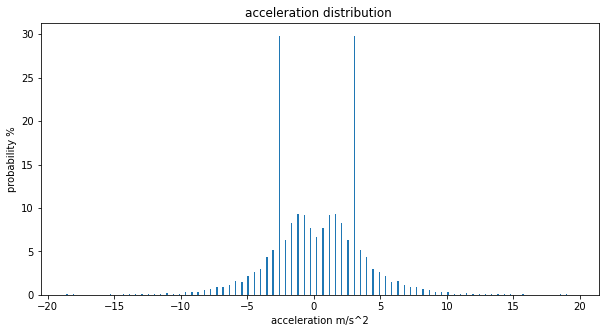

In [452]:
fig, ax = plt.subplots(1,1,figsize = [10,5])
tmp_N = 40 
tmp = np.zeros(tmp_N * 2 + 2)
itv = max(max(max_acc_rcd), -min(min_acc_rcd)) / tmp_N

for acc in min_acc_rcd :
    tmp[tmp_N - int(abs(acc) // itv)] += 1
    
for acc in max_acc_rcd :
    tmp[tmp_N + int(acc // itv)] += 1
    
plt.bar([(i - 40 + 0.5) * itv for i in range(tmp_N * 2 + 2)], 100 * tmp / len(max_acc_rcd), width=3.9/tmp_N)
plt.xlabel("acceleration m/s^2")
plt.ylabel("probability %")
plt.title("acceleration distribution ")

0.013936649453544316

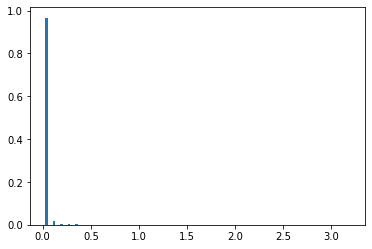

In [453]:
# RL
tmp_N = 40
tmp = np.zeros(tmp_N + 1)
itv = (max(all_beta_rcd) - min(all_beta_rcd)) / tmp_N

bb = min(all_beta_rcd)
for beta in all_beta_rcd :
    tmp[int((beta - bb) // itv)] += 1
plt.bar([(i + 0.5) * itv for i in range(tmp_N + 1)],  (tmp / len(all_beta_rcd)), width=1/tmp_N)

mean_beta = sum(all_beta_rcd) / len(all_beta_rcd)
np.sum((np.array(all_beta_rcd) - mean_beta) ** 2) / len(all_beta_rcd)

0.6016945175656475

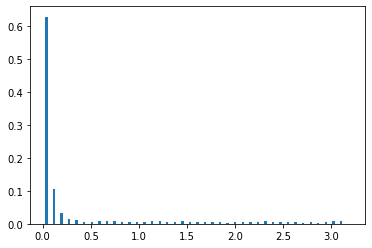

In [454]:

tmp = np.zeros(tmp_N + 1)
itv = (max(max_beta_rcd) - min(max_beta_rcd)) / tmp_N

bb = min(max_beta_rcd)
for beta in max_beta_rcd :
    tmp[int((beta - bb) // itv)] += 1
plt.bar([(i + 0.5) * itv for i in range(tmp_N + 1)], tmp / len(max_beta_rcd), width=1/tmp_N)

mean_beta = sum(max_beta_rcd) / len(max_beta_rcd)
np.sum((np.array(max_beta_rcd) - mean_beta) ** 2) / len(max_beta_rcd)

In [287]:
# 将LANEGCN生成结果存为Interaction的sub文件
import pandas as pd
import re

def num(filename):
    return int(filename.split('_')[-2])

names = ["case_id", "track_id", "frame_id", "timestamp_ms", "agent_type", "track_to_predict", "interesting_agent", "x1", "y1", "psi_rad1", "x2", "y2", "psi_rad2", "x3", "y3", "psi_rad3", "x4", "y4", "psi_rad4", "x5", "y5", "psi_rad5", "x6", "y6", "psi_rad6"]

filenames = os.listdir("/home/user/Projects/interaction_gyt/preprocess_challenge_4s/test_multi-agent/")
filenames.sort(key=num)

for testname in os.listdir('/home/user/Projects/interaction_gyt/Interaction_Multiagent/test_multi-agent/'):
#     testname = "DR_USA_Intersection_EP0_obs.csv"
    data = []
    mapname = testname.split("_obs.csv")[0]

    for fn in filenames:
        if mapname not in fn:
            continue

        with open("/home/user/Projects/interaction_gyt/preprocess_challenge_4s/test_0928_2/" + fn, 'rb') as f:
            pred_data = pickle.load(f, encoding="latin1")

        with open("/home/user/Projects/interaction_gyt/preprocess_challenge_4s/test_multi-agent/" + fn, 'rb') as f:
            origin_data = pickle.load(f, encoding="latin1")

        case_id = origin_data['case_id']
        track_index = sorted(origin_data['track_id'])
        track_index.remove(origin_data['idx'])
        track_index.append(origin_data['idx'])

        for track_id in track_index:
            interesting_agent = 0.0
            if origin_data['idx'] == track_id:
                interesting_agent = 1.0

            for frame_id in range(11, 41):
        #         print(pred_data['others_track'][track_id][frame_id])
                timestamp_ms = frame_id * 100

                row = [case_id, track_id, frame_id, timestamp_ms, "car", "1", interesting_agent]
                for k in range(6):
                    for item in [1,2,5]:
                        row += [pred_data['others_track'][k][track_id][frame_id][item]]
                data.append(row)
#             print(track_id)
#         break
#     break
    test = pd.DataFrame(columns = names, data=data) 
    test.to_csv("/home/user/Projects/interaction_gyt/preprocess_challenge_4s/sub/" + mapname + '_sub.csv', index=False)


In [219]:
origin_data['track_id']

[9, 3, 5, 7, 8]

In [216]:
mapname

'DR_USA_Intersection_EP0_sub.csv'

In [175]:
with open('/home/user/Projects/interaction_gyt/preprocess_challenge_4s/test_0924/DR_CHN_Merging_ZS0_102_13.pkl', 'rb') as f:
    aaa = pickle.load(f, encoding="latin1")

with open('/home/user/Projects/interaction_gyt/preprocess_challenge_4s/test_0924/DR_CHN_Merging_ZS0_122_8.pkl', 'rb') as f:
    bbb = pickle.load(f, encoding="latin1")


In [178]:
aaa['others_track']

[{1: [[1.7999999523162842, 4.71999979019165, 100, 4000],
   [100,
    1135.8389892578125,
    967.9190063476562,
    -0.39501953125,
    -0.08001708984375,
    -2.940999984741211],
   [200,
    1135.4439697265625,
    967.8389892578125,
    -0.39501953125,
    -0.08001708984375,
    -2.940999984741211],
   [300,
    1135.0560302734375,
    967.760009765625,
    -0.387939453125,
    -0.0789794921875,
    -2.940999984741211],
   [400,
    1134.676025390625,
    967.6829833984375,
    -0.3800048828125,
    -0.0770263671875,
    -2.940999984741211],
   [500,
    1134.302978515625,
    967.6069946289062,
    -0.373046875,
    -0.07598876953125,
    -2.940999984741211],
   [600,
    1133.93798828125,
    967.5330200195312,
    -0.364990234375,
    -0.073974609375,
    -2.940999984741211],
   [700,
    1133.58203125,
    967.4600219726562,
    -0.35595703125,
    -0.072998046875,
    -2.940999984741211],
   [800,
    1133.2330322265625,
    967.3880004882812,
    -0.3489990234375,
    -0.0720

In [179]:
sample_path = '/home/user/Projects/interaction_gyt/Interaction_Multiagent/samples/'
test_path = '/home/user/Projects/interaction_gyt/preprocess_challenge_4s/sub/'

for subname in os.listdir(test_path):
    f_sample = open(sample_path + subname, 'r')
    f_test = open(test_path + subname, 'r')
    
    reader = csv.reader(f)
    for row in reader:
        track_id = row[0]
        if track_id not in widths:
            widths[track_id] = row[10]
            lengths[track_id] = row[9]
            
    f_sample.close()
    f_test.close()

[{2: [[1.7599999904632568, 4.5, 100, 4000],
   [100,
    1137.8380126953125,
    971.39501953125,
    -0.3680419921875,
    -0.08001708984375,
    -2.9240000247955322],
   [200,
    1137.469970703125,
    971.3150024414062,
    -0.3680419921875,
    -0.08001708984375,
    -2.924999952316284],
   [300,
    1137.1009521484375,
    971.2349853515625,
    -0.3690185546875,
    -0.08001708984375,
    -2.9260001182556152],
   [400,
    1136.7320556640625,
    971.155029296875,
    -0.368896484375,
    -0.0799560546875,
    -2.9260001182556152],
   [500,
    1136.364013671875,
    971.0759887695312,
    -0.3680419921875,
    -0.07904052734375,
    -2.927000045776367],
   [600,
    1135.9959716796875,
    970.9970092773438,
    -0.3680419921875,
    -0.0789794921875,
    -2.927999973297119],
   [700,
    1135.6290283203125,
    970.9190063476562,
    -0.366943359375,
    -0.0780029296875,
    -2.928999900817871],
   [800,
    1135.2650146484375,
    970.8419799804688,
    -0.364013671875,
    

In [278]:
import csv
sample_path = '/home/user/Projects/interaction_gyt/Interaction_Multiagent/samples/'
test_path = '/home/user/Projects/interaction_gyt/preprocess_challenge_4s/sub/'

for subname in os.listdir(test_path):
# subname = "DR_CHN_Merging_ZS2_sub.csv"
    print (subname)
    f_sample = open(sample_path + subname, 'r')
    f_test = open(test_path + subname, 'r')

    reader_sample = csv.reader(f_sample)
    reader_test = csv.reader(f_test)

    row_sample = next(reader_sample)
    row_test = next(reader_test)

    for i in range(len(row_sample)):
        if row_rample[i] != row_test[i]:
            print ("Header Fail!")
            print (row_sample)
            print (row_test)

    count_sample = 0
    count_test = 0
    while 1:     
        try:
            row_sample = next(reader_sample)
            count_sample += 1
        except Exception as e:
            break

        try:
            row_test = next(reader_test)
            count_test += 1
        except Exception as e:
            break


        for i in [0,1,2,3,5,6]:
            if float(row_sample[i]) != float(row_test[i]):
                print ("entry Fail!", i)
                print (row_sample[i])
                print (row_test[i])
        if row_sample[4] != row_test[4]:
            print ("not car!")
            print (row_sample[4])
            print (row_test[4])

    print (' ', count_sample==count_test, count_sample, count_test)
    f_sample.close()
    f_test.close()

DR_USA_Roundabout_FT_sub.csv
  True 50040 50040
DR_USA_Roundabout_EP_sub.csv
  True 18450 18450
DR_Intersection_CM_sub.csv
  True 17610 17610
DR_USA_Intersection_EP0_sub.csv
  True 13470 13470
DR_DEU_Merging_MT_sub.csv
  True 6990 6990
DR_CHN_Merging_ZS0_sub.csv
  True 90720 90720
DR_DEU_Roundabout_OF_sub.csv
  True 8610 8610
DR_USA_Intersection_MA_sub.csv
  True 45300 45300
DR_Merging_TR0_sub.csv
  True 42900 42900
DR_USA_Intersection_GL_sub.csv
  True 123840 123840
DR_USA_Intersection_EP1_sub.csv
  True 12210 12210
DR_Merging_TR1_sub.csv
  True 40920 40920
DR_Roundabout_RW_sub.csv
  True 2730 2730
DR_CHN_Merging_ZS2_sub.csv
  True 34920 34920
DR_LaneChange_ET0_sub.csv
  True 50490 50490
DR_LaneChange_ET1_sub.csv
  True 59520 59520
DR_USA_Roundabout_SR_sub.csv
  True 24690 24690


In [17]:
###  test 测试读取9013结果
import argparse
import os
os.umask(0)
os.environ["MKL_NUM_THREADS"] = "8"
os.environ["NUMEXPR_NUM_THREADS"] = "8"
os.environ["OMP_NUM_THREADS"] = "8"

os.environ["CUDA_VISIBLE_DEVICES"] = "3"
import math
import pickle
import sys
from importlib import import_module

import torch
from torch.utils.data import DataLoader, Sampler
from torch.utils.data.distributed import DistributedSampler
from tqdm import tqdm

import numpy as np
from data import InteDataset

filepath = '/home/user/Backup/DRL服务器备份/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/test'


root_path = '/home/user/Backup/DRL服务器备份/Projects/LaneGCN_modified'
sys.path.insert(0, root_path)

model = import_module("lanegcn")
config, _, collate_fn, net, loss, post_process, opt = model.get_model()


dataset = InteDataset(filepath)
data_loader = DataLoader(
    dataset,
    batch_size=config["val_batch_size"],
    num_workers=config["val_workers"],
    collate_fn=collate_fn,
    shuffle=False,
    pin_memory=False,
)


###### 10s csv
# csv_filepath = '/home/user/Backup/DRL服务器备份/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/test'
# new_filepath = '/home/user/Backup/DRL服务器备份/Logs/1201/test_1201/'
new_filepath = '/home/user/Downloads/test_1202_2/'
# origin_filepath = '/home/user/Backup/DRL服务器备份/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/test'
save_path = '/home/user/Backup/DRL服务器备份/Logs/1806/test_0608'


# begin inference
preds = {}
gts = {}
cities = {}

data_list = []
off_road_count = 0
total_count = 0
ASD_sum, FSD_sum = 0, 0
k = 0

max_acc_rcd, min_acc_rcd = [], []
all_beta_rcd, max_beta_rcd = [], []
gt_all_beta_rcd = []

use_ground_truth = False #首次启动为True
use_raw_pred = False #默认False

MASD = 0
RMSE = 0
rearidx = [0,1,4,2,3]

AF_acc, AF_beta, Col = 0, 0, 0

# def yaw_diff(cur_yaw, last_yaw):
#     return min((cur_yaw - last_yaw) % 6.28, (last_yaw - cur_yaw) % 6.28)

def yaw_diff(cur_yaw, last_yaw):
    yaw_diff = cur_yaw - last_yaw
    if yaw_diff > 3.14:
        yaw_diff = 6.28 - yaw_diff
    elif yaw_diff < -3.14:
        yaw_diff = 6.28 + yaw_diff
        
    return abs(yaw_diff)



for ii, data in tqdm(enumerate(data_loader)):
    data = dict(data)
    
    for idx in range(len(data['filename'])):
        filename = data['filename'][idx].split('/')[-1]

    # for filename in os.listdir(new_filepath):
        with open(os.path.join(new_filepath, filename), 'rb') as f:
            new_data = pickle.load(f, encoding="latin1")
        with open(os.path.join(filepath, filename), 'rb') as f:
            origin_data = pickle.load(f, encoding="latin1")

        new_data['gt_of_acc_violation'] = {}
        new_data['gt_of_rotation'] = {}
        new_data['gt_of_trouble'] = {}
        new_data['gt_of_all'] = {}
#         new_data['gt_of_collision']

#         for other_id in new_data['others_track']:            

        for a in range(origin_data['shapes'].shape[0]):
            other_id = origin_data['agt_ids'][a]

            traj_xyphi = np.array(new_data['others_track'][other_id][1:])[:,1:][:, rearidx]
            max_acc = float('-inf')
            min_acc = float('inf')
            max_beta = 0

            
            gt_traj = np.concatenate([data['gt_hist'][idx][a][:, :2], data['gt_preds'][idx][a]], axis=0)
            for ttt in range(1, gt_traj.shape[0]):                         
                dx0, dy0 = gt_traj[ttt][0] - gt_traj[ttt-1][0], gt_traj[ttt][1] - gt_traj[ttt-1][1]
                cur_v = np.sqrt(dx0 ** 2 + dy0 ** 2) * 10
                cur_yaw = math.atan2(dy0, dx0)

                dx1, dy1 = gt_traj[ttt-1][0] - gt_traj[ttt-2][0], gt_traj[ttt-1][1] - gt_traj[ttt-2][1]
                last_v = np.sqrt(dx1 ** 2 + dy1 ** 2) * 10
                last_yaw = math.atan2(dy1, dx1)
                
                gt_beta = yaw_diff(cur_yaw, last_yaw)
                gt_all_beta_rcd.append(gt_beta)
                
            
            for ttt in range(1, traj_xyphi.shape[0]):
                cur_v = np.sqrt(traj_xyphi[ttt][3] ** 2 + traj_xyphi[ttt][4] ** 2)
                last_v = np.sqrt(traj_xyphi[ttt-1][3] ** 2 + traj_xyphi[ttt-1][4] ** 2)                            
                cur_yaw = traj_xyphi[ttt][2]
                last_yaw = traj_xyphi[ttt-1][2]

                beta = yaw_diff(cur_yaw, last_yaw)
                all_beta_rcd.append(beta)
                max_beta = max(max_beta, beta)

                acc = (cur_v - last_v) * 10
                max_acc = max(max_acc, acc)
                min_acc = min(min_acc, acc)


            max_beta_rcd.append(max_beta)
            max_acc_rcd.append(max_acc)
            min_acc_rcd.append(min_acc)                

            if max_acc > 4.0 or min_acc < -4.0:
                AF_acc += 1
                new_data['gt_of_acc_violation'][other_id] = np.concatenate([data['gt_hist'][idx][a][:, :2], data['gt_preds'][idx][a]], axis=0)             
                new_data['gt_of_trouble'][other_id] = new_data['gt_of_acc_violation'][other_id]

            if max_beta > 3.0:
                AF_beta += 1
                new_data['gt_of_rotation'][other_id] = np.concatenate([data['gt_hist'][idx][a][:, :2], data['gt_preds'][idx][a]], axis=0)             
                new_data['gt_of_trouble'][other_id] = new_data['gt_of_rotation'][other_id]
                        
            if other_id in new_data['gt_of_collision']:
                Col += 1
                new_data['gt_of_trouble'][other_id] = new_data['gt_of_collision'][other_id]
                
            new_data['gt_of_all'][other_id] = gt_traj 
#             new_data['gt_of_all'][other_id] = np.concatenate([data['gt_hist'][idx][a][:, :2], data['gt_preds'][idx][a]], axis=0)
        
#         with open(os.path.join('/home/user/Backup/DRL服务器备份/Logs/1809/test_gt_all', filename), 'wb') as f22:
#             pickle.dump(new_data, f22, protocol=pickle.HIGHEST_PROTOCOL)

27it [00:39,  1.46s/it]


In [19]:
KL(gt_all_beta_rcd, all_beta_rcd)

0.0738816752873123

In [24]:
max(gt_all_beta_rcd)

3.139990897108587

In [25]:
print(AF_acc, AF_beta, Col)
new_data['gt_of_all']

19 56 828


{104: array([[1011.254,  986.694],
        [1011.218,  986.697],
        [1011.178,  986.7  ],
        [1011.136,  986.703],
        [1011.09 ,  986.707],
        [1011.039,  986.711],
        [1010.984,  986.716],
        [1010.923,  986.721],
        [1010.857,  986.727],
        [1010.783,  986.733],
        [1010.701,  986.741],
        [1010.611,  986.749],
        [1010.511,  986.758],
        [1010.4  ,  986.768],
        [1010.279,  986.779],
        [1010.145,  986.791],
        [1009.999,  986.804],
        [1009.84 ,  986.818],
        [1009.667,  986.833],
        [1009.479,  986.849],
        [1009.277,  986.865],
        [1009.06 ,  986.882],
        [1008.828,  986.9  ],
        [1008.58 ,  986.918],
        [1008.317,  986.937],
        [1008.038,  986.957],
        [1007.744,  986.977],
        [1007.435,  986.998],
        [1007.111,  987.019],
        [1006.773,  987.041],
        [1006.421,  987.063],
        [1006.056,  987.087],
        [1005.678,  987.11 ],
     

In [8]:
def KL(gt, pred):
    
    tmp_N = 40
    prob_gt = np.zeros(tmp_N + 1)
    prob_pred = np.zeros(tmp_N + 1)
    
    upper = max(max(gt), max(pred))
    lower = min(min(gt), min(pred))
#     print(upper, lower)

    itv = (upper - lower) / tmp_N

    for beta in gt:
        prob_gt[int((beta - lower) // itv)] += 1
    prob_gt /= sum(prob_gt)
#     np.set_printoptions(precision = 8)
#     print("prob_gt", np.around(prob_gt, 3))
    
    for beta in pred:
        prob_pred[int((beta - lower) // itv)] += 1 
    prob_pred /= sum(prob_pred)
#     print("prob_pred", np.around(prob_pred, 3))
    
    res = 0
    for i in range(tmp_N):
#         if prob_gt[i] > 10e-16:
        res += prob_pred[i] * np.log((prob_pred[i] + 1e-6) / (prob_gt[i] + 1e-6))
    return res

In [ ]:
# densetnt
###  test 测试读取9013结果
import argparse
import os
os.umask(0)
os.environ["MKL_NUM_THREADS"] = "8"
os.environ["NUMEXPR_NUM_THREADS"] = "8"
os.environ["OMP_NUM_THREADS"] = "8"

os.environ["CUDA_VISIBLE_DEVICES"] = "3"
import math
import pickle
import sys
from importlib import import_module

import torch
from torch.utils.data import DataLoader, Sampler
from torch.utils.data.distributed import DistributedSampler
from tqdm import tqdm

import numpy as np
from data import InteDataset

filepath = '/home/user/Backup/DRL服务器备份/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/test'


root_path = '/home/user/Backup/DRL服务器备份/Projects/LaneGCN_modified'
sys.path.insert(0, root_path)

model = import_module("lanegcn")
config, _, collate_fn, net, loss, post_process, opt = model.get_model()


dataset = InteDataset(filepath)
data_loader = DataLoader(
    dataset,
    batch_size=config["val_batch_size"],
    num_workers=config["val_workers"],
    collate_fn=collate_fn,
    shuffle=False,
    pin_memory=False,
)


###### 10s csv
# csv_filepath = '/home/user/Backup/DRL服务器备份/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/test'
# new_filepath = '/home/user/Backup/DRL服务器备份/Logs/1201/test_1201/'
new_filepath = '/home/user/Downloads/test_1202_2/'
# origin_filepath = '/home/user/Backup/DRL服务器备份/Projects/interaction_gyt/preprocess_results_10s_use_csv_EP0_with_agtid_final/test'
save_path = '/home/user/Backup/DRL服务器备份/Logs/1806/test_0608'


# begin inference
preds = {}
gts = {}
cities = {}

data_list = []
off_road_count = 0
total_count = 0
ASD_sum, FSD_sum = 0, 0
k = 0

max_acc_rcd, min_acc_rcd = [], []
all_beta_rcd, max_beta_rcd = [], []
gt_all_beta_rcd = []

use_ground_truth = False #首次启动为True
use_raw_pred = False #默认False

MASD = 0
RMSE = 0
rearidx = [0,1,4,2,3]

AF_acc, AF_beta, Col = 0, 0, 0

# def yaw_diff(cur_yaw, last_yaw):
#     return min((cur_yaw - last_yaw) % 6.28, (last_yaw - cur_yaw) % 6.28)

def yaw_diff(cur_yaw, last_yaw):
    yaw_diff = cur_yaw - last_yaw
    if yaw_diff > 3.14:
        yaw_diff = 6.28 - yaw_diff
    elif yaw_diff < -3.14:
        yaw_diff = 6.28 + yaw_diff
        
    return abs(yaw_diff)


with open('/home/user/Backup/DRL服务器备份/Projects/DenseTNT/pred_trajs', 'rb') as f:
     pred_trajs = pickle.load(f, encoding="latin1")
        
for ii, data in tqdm(enumerate(data_loader)):
    data = dict(data)
    
    for idx in range(len(data['filename'])):
        filename = data['filename'][idx].split('/')[-1]

    # for filename in os.listdir(new_filepath):
        with open(os.path.join(new_filepath, filename), 'rb') as f:
            new_data = pickle.load(f, encoding="latin1")
        with open(os.path.join(filepath, filename), 'rb') as f:
            origin_data = pickle.load(f, encoding="latin1")

        new_data['gt_of_acc_violation'] = {}
        new_data['gt_of_rotation'] = {}
        new_data['gt_of_trouble'] = {}
        new_data['gt_of_all'] = {}
#         new_data['gt_of_collision']

#         for other_id in new_data['others_track']:            

        for a in range(origin_data['shapes'].shape[0]):
            other_id = origin_data['agt_ids'][a]

            traj_xyphi = np.array(new_data['others_track'][other_id][1:])[:,1:][:, rearidx]
            max_acc = float('-inf')
            min_acc = float('inf')
            max_beta = 0

            
            gt_traj = np.concatenate([data['gt_hist'][idx][a][:, :2], data['gt_preds'][idx][a]], axis=0)
            for ttt in range(1, gt_traj.shape[0]):                         
                dx0, dy0 = gt_traj[ttt][0] - gt_traj[ttt-1][0], gt_traj[ttt][1] - gt_traj[ttt-1][1]
                cur_v = np.sqrt(dx0 ** 2 + dy0 ** 2) * 10
                cur_yaw = math.atan2(dy0, dx0)

                dx1, dy1 = gt_traj[ttt-1][0] - gt_traj[ttt-2][0], gt_traj[ttt-1][1] - gt_traj[ttt-2][1]
                last_v = np.sqrt(dx1 ** 2 + dy1 ** 2) * 10
                last_yaw = math.atan2(dy1, dx1)
                
                gt_beta = yaw_diff(cur_yaw, last_yaw)
                gt_all_beta_rcd.append(gt_beta)
                
            pred_traj = np.concatenate([pred_trajs[filename][0], data['gt_preds'][idx][a]], axis=0)
            
            for ttt in range(1, traj_xyphi.shape[0]):
                cur_v = np.sqrt(traj_xyphi[ttt][3] ** 2 + traj_xyphi[ttt][4] ** 2)
                last_v = np.sqrt(traj_xyphi[ttt-1][3] ** 2 + traj_xyphi[ttt-1][4] ** 2)                            
                cur_yaw = traj_xyphi[ttt][2]
                last_yaw = traj_xyphi[ttt-1][2]

                beta = yaw_diff(cur_yaw, last_yaw)
                all_beta_rcd.append(beta)
                max_beta = max(max_beta, beta)

                acc = (cur_v - last_v) * 10
                max_acc = max(max_acc, acc)
                min_acc = min(min_acc, acc)


            max_beta_rcd.append(max_beta)
            max_acc_rcd.append(max_acc)
            min_acc_rcd.append(min_acc)                

            if max_acc > 4.0 or min_acc < -4.0:
                AF_acc += 1
                new_data['gt_of_acc_violation'][other_id] = np.concatenate([data['gt_hist'][idx][a][:, :2], data['gt_preds'][idx][a]], axis=0)             
                new_data['gt_of_trouble'][other_id] = new_data['gt_of_acc_violation'][other_id]

            if max_beta > 3.0:
                AF_beta += 1
                new_data['gt_of_rotation'][other_id] = np.concatenate([data['gt_hist'][idx][a][:, :2], data['gt_preds'][idx][a]], axis=0)             
                new_data['gt_of_trouble'][other_id] = new_data['gt_of_rotation'][other_id]
                        
            if other_id in new_data['gt_of_collision']:
                Col += 1
                new_data['gt_of_trouble'][other_id] = new_data['gt_of_collision'][other_id]
                
            new_data['gt_of_all'][other_id] = gt_traj 
#             new_data['gt_of_all'][other_id] = np.concatenate([data['gt_hist'][idx][a][:, :2], data['gt_preds'][idx][a]], axis=0)
        
#         with open(os.path.join('/home/user/Backup/DRL服务器备份/Logs/1809/test_gt_all', filename), 'wb') as f22:
#             pickle.dump(new_data, f22, protocol=pickle.HIGHEST_PROTOCOL)